In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive


/content/gdrive


In [4]:
cd MyDrive

/content/gdrive/MyDrive


In [5]:
from tweepy import OAuthHandler
from tweepy import API
import tweepy as tw
import numpy as np
import plotly.graph_objs as pt
import plotly
import plotly.express as ex
import pandas as pd
import re
import pickle
import matplotlib.pyplot as mp

In [ ]:
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""
user="DelhiPolice"




auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
auth_api = API(auth, wait_on_rate_limit=True)

In [ ]:
trend_place=auth_api.trends_place(23424848)
trend_place=trend_place[0]['trends'][:10]
c=0

for i in trend_place:
  print(i['name'])
  if(c==0):
    prom_hast=i['name']
    c+=1
# print(prom_hast)

#CSKvRR
Dhoni
#VaccineForAll
#ManmohanSingh
Help Like Sushant
#HBDTeluguPrideCBN
McDonald
#HAPPY_BIRTH_JAY
Thala
Sam Curran


In [ ]:
trend_tweets=[]
c=0
for i, j in enumerate(tw.Cursor(auth_api.search,q=prom_hast).items()):
  c+=1
  trend_tweets.append(j)
  if(c>999):
    break

In [14]:
file1= open("section_2_trends_tweets_collected.txt","w")
for i in range(len(trend_tweets)):
  file1.write(str(trend_tweets[i].id)+" "+trend_tweets[i].text+"\n")
file1.close()

In [ ]:
hast=[]
for i in range(len(trend_tweets)):
  s=trend_tweets[i].text.split(" ")
  if(len(s)>0):

    for j in range(len(s)):
      if(len(s[j])>0):
        s[j]=s[j].lower()
        if(s[j][0]=="#"):
          if(prom_hast not in s[j] and "\n" not in s[j]):
            hast.append(s[j])



In [ ]:
hast_count={}
for i in range(len(hast)):
  
  if hast[i] in hast_count:
    hast_count[hast[i]]+=1
  else:
    hast_count[hast[i]]=1
sort_hast = sorted(hast_count.items(), key=lambda x: x[1], reverse=True)[1:11]
sort_hast

[('#yellove', 451),
 ('#cskvrr', 299),
 ('#ipl2021', 116),
 ('#csk', 37),
 ('#royalsfamily', 25),
 ('#whistles', 16),
 ('#hallabol', 14),
 ('#master', 13),
 ('#rr', 12),
 ('#vivoipl', 11)]

In [ ]:
tophast_json=[]
for k in sort_hast:
  trend_tweets=[]
  c=0
  for i, j in enumerate(tw.Cursor(auth_api.search,q=k[0]).items()):
    c+=1
    trend_tweets.append(j)
    if(c>99):
     break
  tophast_json.append(trend_tweets)

In [ ]:
with open('tophast_json.pickle', 'wb') as write:
    pickle.dump(tophast_json, write, protocol=pickle.HIGHEST_PROTOCOL) 
with open('trend_tweets.pickle', 'wb') as write:
    pickle.dump(trend_tweets, write, protocol=pickle.HIGHEST_PROTOCOL)
with open('trend_place.pickle', 'wb') as write:
    pickle.dump(trend_place, write, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('tophast_json.pickle', 'rb') as read: 
#     tophast_json = pickle.load(read)
# with open('trend_tweets.pickle', 'rb') as read:  
#     trend_tweets = pickle.load(read)
# with open('trend_place.pickle', 'rb') as read:
#     trend_place = pickle.load(read)


In [15]:
t=[]
for i in tophast_json:
  for j in i:
    t.append(j)
file1= open("section_2_tweets_collected.txt","w")
for i in range(len(t)):
  file1.write(str(t[i].id)+" "+t[i].text+"\n")
file1.close()
print(len(t))

1000


In [23]:
def cof(h,tophast_json):
  tweet=[]
  r=0
  for i in tophast_json:
    for j in i:
      text=j.text.lower()
      if(h in text):
        tweet.append(j)
  for i in tweet:
    if(i.text[:2]=="RT"):
      r+=1
  r=r/len(tweet)*100

  #########
  f=0
  top50={}
  for i in tweet:
    if(i.user.id in top50):
      top50[i.user.id]+=1
    else:
      top50[i.user.id]=1
  sort_top50 = sorted(top50.items(), key=lambda x: x[1], reverse=True)
  try:
    sort_top50=sort_top50[:50]
  except:
    sort_top50=sort_top50
  tweetsBy50Users = 0
  for i in sort_top50:
    tweetsBy50Users += i[1]
  
  f = tweetsBy50Users/len(tweet)*100

  u = len(tweet) / len(top50)

  c = r/10 + f + u
  
  return r,f,u,c

  
  

  




['#yellove', '#cskvrr', '#ipl2021', '#csk', '#royalsfamily', '#rr', '#whistles', '#hallabol', '#rrvcsk', '#thalapathy65']
Number of occurence
 [271, 223, 147, 143, 122, 104, 102, 54, 52, 46]


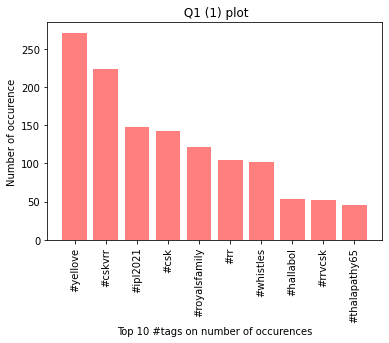

In [34]:
most_occ=[]
for i in tophast_json:
  for j in i:
    s=j.text.split(" ")
    if(len(s)>0):

      for j in range(len(s)):
       if(len(s[j])>0):
         s[j]=s[j].lower()
         if(s[j][0]=="#"):
           if("\n" not in s[j]):
             most_occ.append(s[j])

most_occ_count={}
for i in range(len(most_occ)):
  
  if most_occ[i] in most_occ_count:
    most_occ_count[most_occ[i]]+=1
  else:
    most_occ_count[most_occ[i]]=1
sort_hast = sorted(most_occ_count.items(), key=lambda x: x[1], reverse=True)[1:11]
# sort_hast
  

top_words=[]
top_frq=[]
for i in range(len(sort_hast)):
  top_frq.append(sort_hast[i][1])
  top_words.append(sort_hast[i][0])

r=[]
f=[]
u=[]
c=[]
for i in top_words:
  ro,fo,uo,co=cof(i,tophast_json)
  r.append(ro)
  f.append(fo)
  u.append(uo)
  c.append(co)

  # c.append())



print(top_words)

# print("coefficient of traffic manipulation\n",c)


print('Number of occurence\n',top_frq)
mp.bar(top_words, top_frq,color='r', align = 'center', alpha = 0.5)
mp.ylabel('Number of occurence')
mp.xlabel('Top 10 #tags on number of occurences')
mp.xticks(top_words)
mp.xticks(rotation = 90)
mp.title(" Q1 (1) plot")
mp.show()

# print(cof("#yellove",tophast_json))

In [37]:
df = pd.DataFrame([top_words,r,f,u,c])
df


,0,1,2,3,4,5,6,7,8,9
0,#yellove,#cskvrr,#ipl2021,#csk,#royalsfamily,#rr,#whistles,#hallabol,#rrvcsk,#thalapathy65
1,97.8182,81.2727,50.9709,71.9941,96.8944,49.3243,100,91.1111,70.1754,89.0909
2,40,31.2727,56.3107,26.6862,86.3354,60.1351,50.9804,78.3333,100,100
3,1.27907,1.51515,1.54887,1.46667,2.23611,1.3578,1.02,2.06897,1.54054,1.96429
4,51.0609,40.9152,62.9566,35.3523,98.261,66.4254,62.0004,89.5134,108.558,110.873


['#royalsfamily', '#vivoipl', '#ipl2021', '#rr', '#csk', '#ipl2021…', '#rrvcsk', '#whistlepodu', '#cskvsrr', '#msdhoni']
Number of occurence
 [1175, 392, 295, 72, 30, 9, 7, 4, 4, 3]


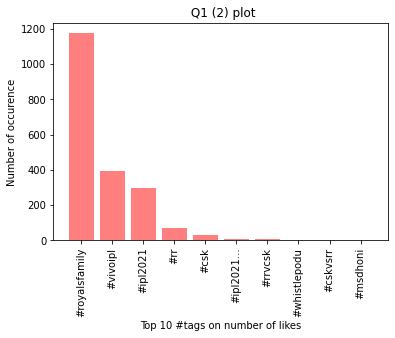

In [38]:
most_likes={}
for i in tophast_json:
  for j in i:
    s=j.text.split(" ")
    if(len(s)>0):

      for k in range(len(s)):
       if(len(s[k])>0):
         s[k]=s[k].lower()
         if(s[k][0]=="#"):
           if( "\n" not in s[k]):
            #  most_occ.append(s[j])
            if s[k] in most_likes:
              most_likes[s[k]]+=j.favorite_count
            else:
              most_likes[s[k]]=j.favorite_count
sort_hast = sorted(most_likes.items(), key=lambda x: x[1], reverse=True)[1:11]
# sort_hast


top_words=[]
top_frq=[]
for i in range(len(sort_hast)):
  top_frq.append(sort_hast[i][1])
  top_words.append(sort_hast[i][0])
r=[]
f=[]
u=[]
c=[]
for i in top_words:
  ro,fo,uo,co=cof(i,tophast_json)
  r.append(ro)
  f.append(fo)
  u.append(uo)
  c.append(co)

  # c.append())

print(top_words)

# print("coefficient of traffic manipulation\n",c)


print('Number of occurence\n',top_frq)
mp.bar(top_words, top_frq,color='r', align = 'center', alpha = 0.5)
mp.ylabel('Number of occurence')
mp.xlabel('Top 10 #tags on number of likes')
mp.xticks(top_words)
mp.xticks(rotation = 90)
mp.title(" Q1 (2) plot")
mp.show()



In [39]:
df = pd.DataFrame([top_words,r,f,u,c])
df

,0,1,2,3,4,5,6,7,8,9
0,#royalsfamily,#vivoipl,#ipl2021,#rr,#csk,#ipl2021…,#rrvcsk,#whistlepodu,#cskvsrr,#msdhoni
1,96.8944,63.6364,50.9709,49.3243,71.9941,0,70.1754,95.1389,30.303,35.7143
2,86.3354,84.8485,56.3107,60.1351,26.6862,100,100,38.1944,100,100
3,2.23611,1.1,1.54887,1.3578,1.46667,2,1.54054,1.26316,1.22222,1.75
4,98.261,92.3121,62.9566,66.4254,35.3523,102,108.558,48.9715,104.253,105.321


['#whistlepodu', '#ipl2021', '#hallabol', '#whistles', '#cskvrr', '#csk', '#royalsfamily', '#master', '#fanof…', '#rr']
Number of occurence
 [80510, 63352, 54868, 36293, 9487, 6443, 5250, 5225, 5066, 4795]


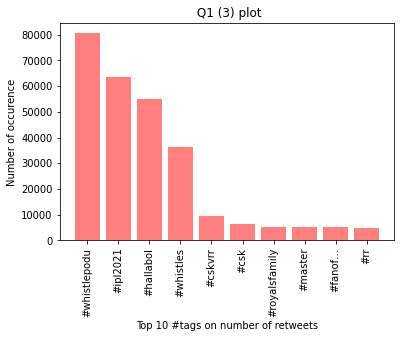

In [40]:
most_likes={}
for i in tophast_json:
  for j in i:
    s=j.text.split(" ")
    if(len(s)>0):

      for k in range(len(s)):
       if(len(s[k])>0):
         s[k]=s[k].lower()
         if(s[k][0]=="#"):
           if( "\n" not in s[k]):
            #  most_occ.append(s[j])
            if s[k] in most_likes:
              most_likes[s[k]]+=j.retweet_count
            else:
              most_likes[s[k]]=j.retweet_count
sort_hast = sorted(most_likes.items(), key=lambda x: x[1], reverse=True)[1:11]
# sort_hast


top_words=[]
top_frq=[]
for i in range(len(sort_hast)):
  top_frq.append(sort_hast[i][1])
  top_words.append(sort_hast[i][0])

r=[]
f=[]
u=[]
c=[]
for i in top_words:
  ro,fo,uo,co=cof(i,tophast_json)
  r.append(ro)
  f.append(fo)
  u.append(uo)
  c.append(co)

  # c.append())

print(top_words)

# print("coefficient of traffic manipulation\n",c)


print('Number of occurence\n',top_frq)
mp.bar(top_words, top_frq,color='r', align = 'center', alpha = 0.5)
mp.ylabel('Number of occurence')
mp.xlabel('Top 10 #tags on number of retweets')
mp.xticks(top_words)
mp.xticks(rotation = 90)
mp.title(" Q1 (3) plot")
mp.show()


In [41]:
df = pd.DataFrame([top_words,r,f,u,c])
df

,0,1,2,3,4,5,6,7,8,9
0,#whistlepodu,#ipl2021,#hallabol,#whistles,#cskvrr,#csk,#royalsfamily,#master,#fanof…,#rr
1,95.1389,50.9709,91.1111,100,81.2727,71.9941,96.8944,93.8144,100,49.3243
2,38.1944,56.3107,78.3333,50.9804,31.2727,26.6862,86.3354,100,100,60.1351
3,1.26316,1.54887,2.06897,1.02,1.51515,1.46667,2.23611,2.425,10,1.3578
4,48.9715,62.9566,89.5134,62.0004,40.9152,35.3523,98.261,111.806,120,66.4254
